# CENSUS ANALYSIS

# IMPORTING:

Importing necessary libraries to analyse the census data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import *
from sklearn.linear_model import LinearRegression

Importing the census data

In [2]:
census1=pd.read_csv (r'D:\Keethu\MSc data science\2nd sem\dsa\PROJECT\india-districts-census-2011.csv')
census2=pd.read_excel(r'D:\Keethu\MSc data science\2nd sem\dsa\PROJECT\india-census-1951-2011.xlsx')
census3=pd.read_excel(r'D:\Keethu\MSc data science\2nd sem\dsa\PROJECT\india literacy and mortality.xlsx')

# DATA PREPROCESSING:

Handling missing values in the data 

In [3]:
census1.isna().any().sum()

0

In [4]:
census2.isna().any().sum()

3

In [5]:
census2.isna().any()

Year                            False
 Uttar Pradesh                  False
 Maharashtra                    False
 Bihar                          False
 West Bengal                    False
 Madhya Pradesh                 False
 Tamil Nadu                     False
 Rajasthan                      False
 Karnataka                      False
 Gujarat                        False
 Andhra Pradesh                 False
 Odisha                         False
 Telangana                       True
 Kerala                         False
 Jharkhand                      False
 Assam                          False
 Punjab                         False
 Haryana                        False
 Chhattisgarh                   False
 Jammu and Kashmir              False
 Uttarakhand                    False
 Himachal Pradesh               False
 Tripura                        False
 Meghalaya                      False
 Manipur?                       False
 Nagaland                       False
 Goa        

In [6]:
census2[" Telangana"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6    35193978.0
Name:  Telangana, dtype: float64

In [7]:
census2=census2.drop([" Telangana"],axis=1)
census2.loc[census2[" Arunachal Pradesh"].isna()," Arunachal Pradesh"]=0
census2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7 non-null      object 
 1    Uttar Pradesh                7 non-null      int64  
 2    Maharashtra                  7 non-null      int64  
 3    Bihar                        7 non-null      int64  
 4    West Bengal                  7 non-null      int64  
 5    Madhya Pradesh               7 non-null      int64  
 6    Tamil Nadu                   7 non-null      int64  
 7    Rajasthan                    7 non-null      int64  
 8    Karnataka                    7 non-null      int64  
 9    Gujarat                      7 non-null      int64  
 10   Andhra Pradesh               7 non-null      int64  
 11   Odisha                       7 non-null      int64  
 12   Kerala                       7 non-null      int64  
 13   Jharkhan

In [8]:
census3.isna().any()

 Year                    False
          Total          False
     Rural               False
     Urban               False
female literacy rate     False
Infant mortality rate    False
Unnamed: 6                True
Unnamed: 7                True
Unnamed: 8                True
Unnamed: 9                True
Unnamed: 10               True
dtype: bool

In [9]:
census3=census3.drop(["Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10"],axis=1)

Rename state Manipur? to Manipur :

In [10]:
census2=census2.replace('Manipur?','Manipur')

# EXPLORATORY DATA ANALYSIS

# POPULATION OF TAMILNADU FROM 1951-2011

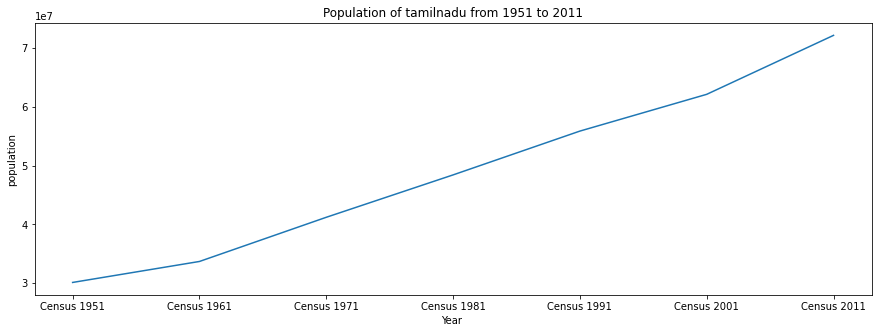

In [11]:
population=census2.groupby('Year')[[' Tamil Nadu']].sum()
fig=plt.figure(figsize=(15,5))
plt.plot(population)
plt.xlabel("Year ")
plt.ylabel("population")
plt.title("Population of tamilnadu from 1951 to 2011")
plt.show()

# LITERACY RATE

Top 5 states based on literacy rate :

For females :

In [12]:
f_literate=census1.groupby('State name')['Female_Literate'].sum()
f_pop=census1.groupby('State name')['Female'].sum()
fLiterate=(f_literate/f_pop)*100
fLiterate.sort_values(axis=0, ascending=False, kind='quicksort').head(5)

State name
KERALA                         83.038221
LAKSHADWEEP                    78.245614
GOA                            76.405363
MIZORAM                        75.598994
ANDAMAN AND NICOBAR ISLANDS    73.098869
dtype: float64

For males :

In [13]:
m_literate=census1.groupby('State name')['Male_Literate'].sum()
m_pop=census1.groupby('State name')['Male'].sum()
mLiterate=(m_literate/m_pop)*100
mLiterate.sort_values(axis=0, ascending=False, kind='quicksort').head(5)

State name
KERALA           85.509145
LAKSHADWEEP      84.602844
GOA              83.316151
DAMAN AND DIU    82.928923
PONDICHERRY      81.203113
dtype: float64

# WORKING POPULATION

Working population by gender :

In [14]:
f_workers=census1.groupby('State name')['Female_Workers'].sum()
m_workers=census1.groupby('State name')['Male_Workers'].sum()
working=f_workers.to_frame()
working['Male_Workers']=m_workers

Percentage of female workers among all workers :

In [15]:
workers=census1.groupby('State name')['Workers'].sum()
fworkers=(f_workers/workers)*100
fworkers.sort_values(axis=0, ascending=False, kind='quicksort').head(5)

State name
NAGALAND            43.810221
MANIPUR             43.323445
HIMACHAL PRADESH    42.592561
CHHATTISGARH        41.430754
MEGHALAYA           40.646278
dtype: float64

Percentage of male workers among all workers :

In [16]:
Mworkers=(100-fworkers)
Mworkers.sort_values(axis=0, ascending=False, kind='quicksort').head(5)

State name
DAMAN AND DIU    88.590017
NCT OF DELHI     85.233296
LAKSHADWEEP      81.682931
PUNJAB           81.578879
CHANDIGARH       81.200141
dtype: float64

# AVERAGE:

In [17]:
p_total=census1['Population'].sum()
print("Indian population as of 2011 : ",p_total)
s_total=census1['State name'].nunique()
print("Total number of states(including union territories : ",s_total)
p_mean=p_total/s_total
print("\nAverage population per state (including union territories) : ",round(p_mean,2))

Indian population as of 2011 :  1210854977
Total number of states(including union territories :  35

Average population per state (including union territories) :  34595856.49


# CORRELATION:

In [29]:
data1=[(8.86,186.737),(15.35,159.366),(21.97,139.828),(29.76,111.716),(39.29,86.564),(53.67,64.471),(65.46,43.232)]
data_1=pd.DataFrame(data1,columns=["Female literacy rate","Infant mortality rate"])
data_1.corr()

,Female literacy rate,Infant mortality rate
Female literacy rate,1.000000,-0.984036
Infant mortality rate,-0.984036,1.000000


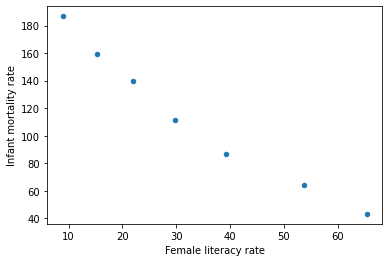

In [30]:
data_1.plot(kind='scatter',x='Female literacy rate',y='Infant mortality rate')
plt.show()

# REGRESSION:

In [31]:
female_literacy=[8.86,15.35,21.97,29.76,39.29,53.67,65.46]
infant_mortality=[186.737,159.366,139.828,111.716,86.564,64.471,43.232]
data2= pd.DataFrame(female_literacy, index =[1,2,3,4,5,6,7],columns =['female_literacy'])
data1=pd.DataFrame(infant_mortality, index =[1,2,3,4,5,6,7],columns =['infant_mortality'])
regressor = LinearRegression()
regressor.fit(data1,data2)

#regression intercept
print(regressor.intercept_)

[77.56618939]


In [22]:
#regression coefficient
print(regressor.coef_)

[[-0.38969298]]


In [23]:
#predicted value
y=(regressor.coef_*28.771)+regressor.intercept_
print("Predicted female literacy rate in 2021 : ",y)

Predicted female literacy rate in 2021 :  [[66.3543327]]


# VISUALISATION

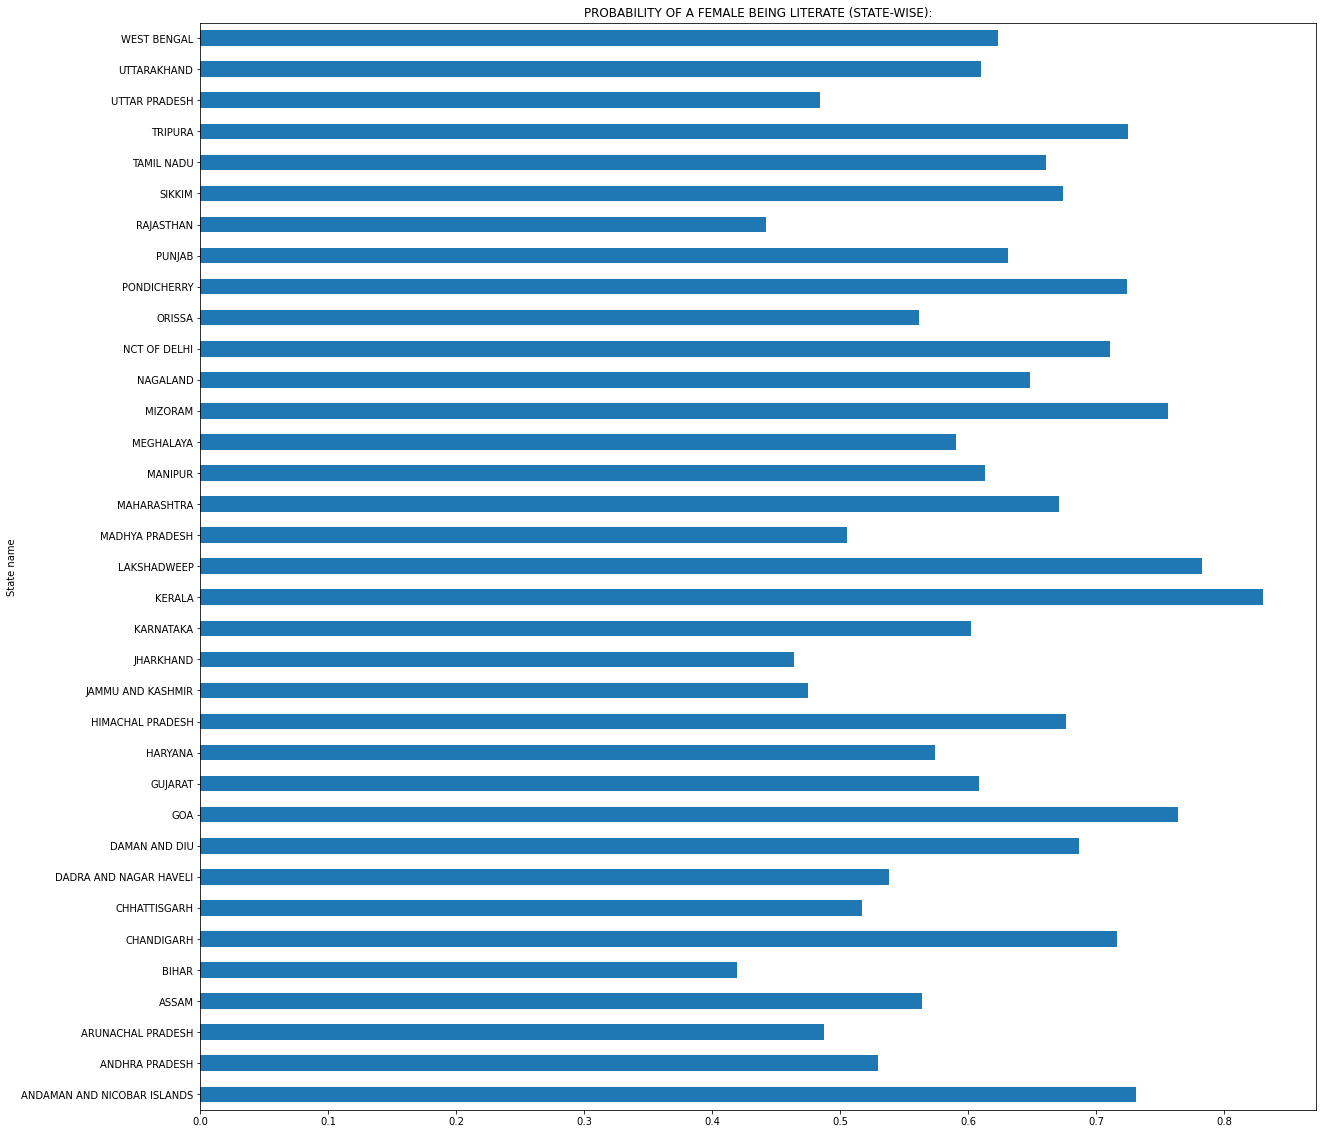

In [24]:
f_literate=census1.groupby('State name')['Female_Literate'].sum()
f_pop=census1.groupby('State name')['Female'].sum()
fLiterate_prob=f_literate/f_pop
m_literate=census1.groupby('State name')['Male_Literate'].sum()
m_pop=census1.groupby('State name')['Male'].sum()
mLiterate_prob=m_literate/m_pop
fig=plt.figure(figsize=(20,20))
fLiterate_prob.plot.barh()
plt.title("PROBABILITY OF A FEMALE BEING LITERATE (STATE-WISE):")
plt.show()

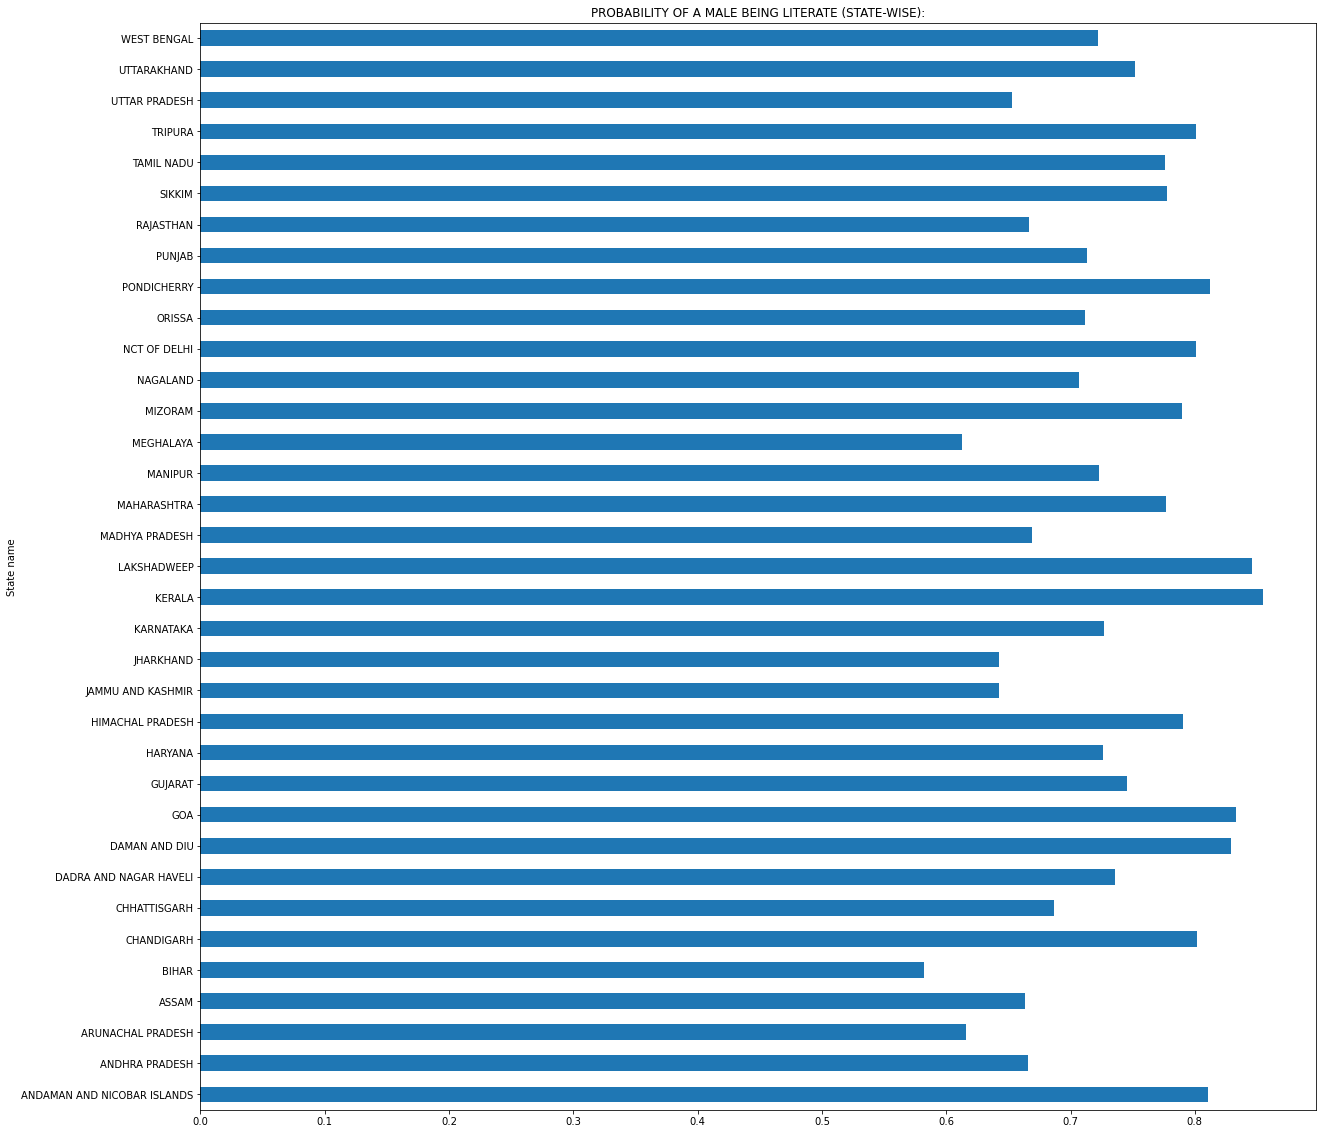

In [25]:
fig=plt.figure(figsize=(20,20))
mLiterate_prob.plot.barh()
plt.title("PROBABILITY OF A MALE BEING LITERATE (STATE-WISE):")
plt.show()

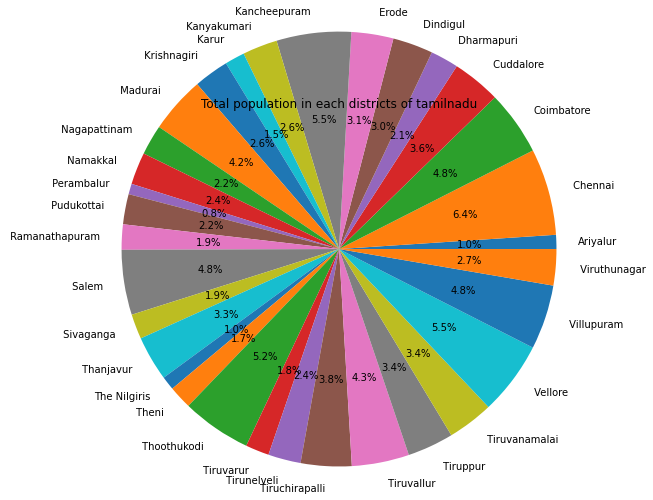

In [38]:
tn_pop=census1[census1['State name'] == 'TAMIL NADU'].groupby('District name')['Population'].sum()
districts=['Ariyalur',' Chennai','Coimbatore',' Cuddalore',' Dharmapuri',' Dindigul',' Erode',' Kancheepuram',' Kanyakumari',' Karur',' Krishnagiri',' Madurai',' Nagapattinam',' Namakkal',' Perambalur',' Pudukottai',' Ramanathapuram',' Salem',' Sivaganga',' Thanjavur','The Nilgiris',' Theni',' Thoothukodi',' Tiruvarur',' Tirunelveli',' Tiruchirapalli',' Tiruvallur',' Tiruppur',' Tiruvanamalai',' Vellore',' Villupuram',' Viruthunagar']
fig=plt.figure(figsize=(5,5))
plt.pie(tn_pop,labels=districts,radius=2,autopct='%0.1f%%')
plt.title("Total population in each districts of tamilnadu")
plt.show()

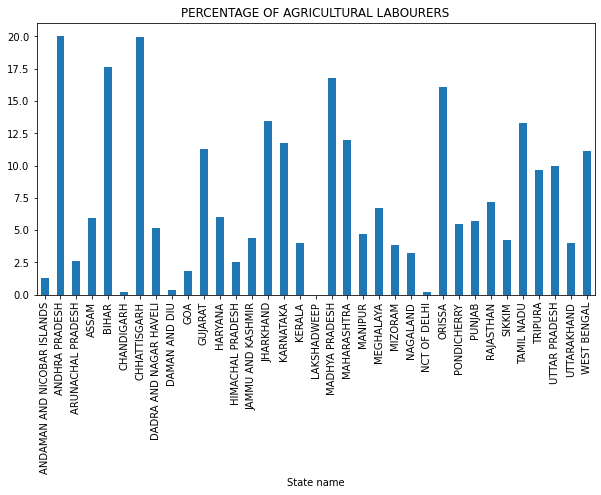

In [26]:
#state-wise percentage of agricultural workers
agri_pop=census1.groupby('State name')['Agricultural_Workers'].sum()
total_pop=census1.groupby('State name')['Population'].sum()
p_of_agri=(agri_pop/total_pop)*100
plt.figure(figsize=(10,5))
p_of_agri.plot.bar()
plt.title("PERCENTAGE OF AGRICULTURAL LABOURERS")
plt.show()

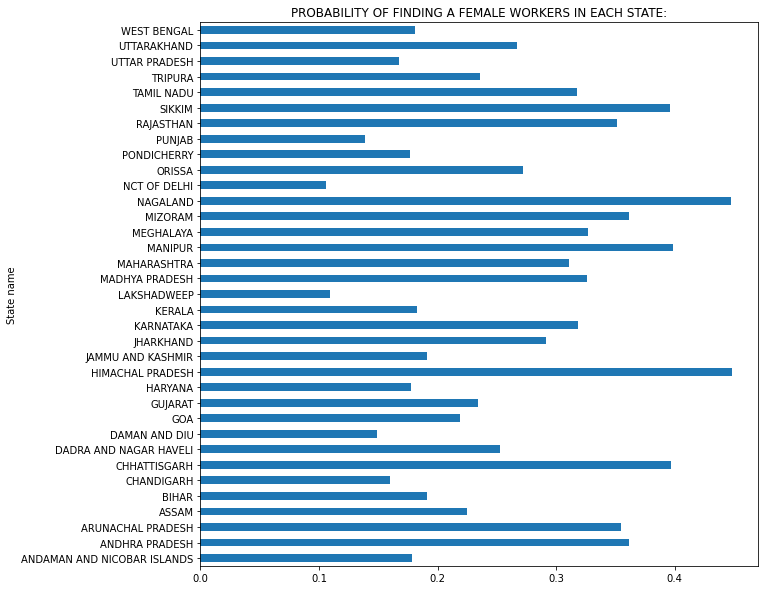

In [27]:
f_workers=census1.groupby('State name')['Female_Workers'].sum()
f_pop=census1.groupby('State name')['Female'].sum()
fworkers_prob=f_workers/f_pop
M_workers=census1.groupby('State name')['Male_Workers'].sum()
M_pop=census1.groupby('State name')['Male'].sum()
Mworkers_prob=M_workers/M_pop
fig=plt.figure(figsize=(10,10))
fworkers_prob.plot.barh()
plt.title("PROBABILITY OF FINDING A FEMALE WORKERS IN EACH STATE:")
plt.show()

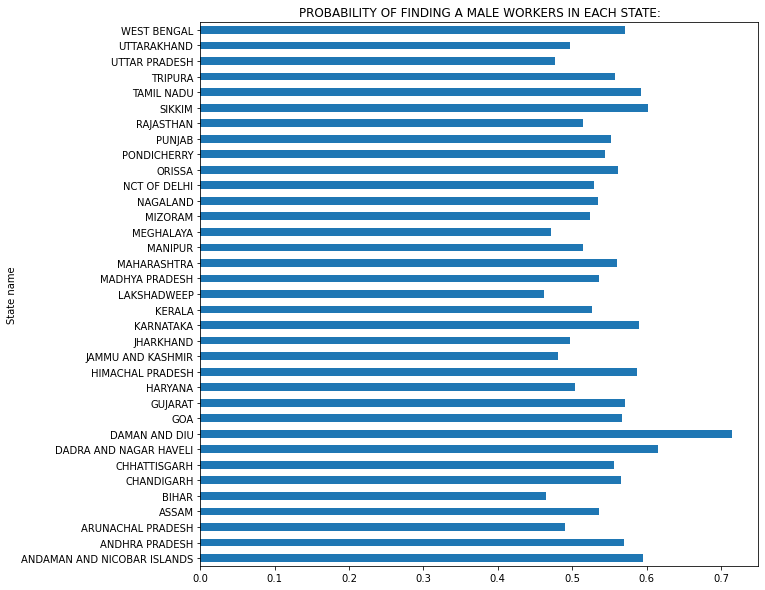

In [32]:
fig=plt.figure(figsize=(10,10))
Mworkers_prob.plot.barh()
plt.title("PROBABILITY OF FINDING A MALE WORKERS IN EACH STATE:")
plt.show()

INSIGHTS :

- Population of tamilnadu is increasing steadily since 1961.
- Kerala has the highest female and male literacy among all the other states in India in 2011.
- Proportion of female workers to male workers is highest for Nagaland.
- Average population of a state in India = 34595856.49
- Female literacy rate and infant mortality rate are highly correlated in india with a negative correlation of 0.984036
- Predicted female literacy rate in 2021 :  66.35 % 
- Percentage of agricultural labourers is highest for Andra Pradesh and Chandigarh.